In [1]:
# Code generating visuals and numbers for data exploration
import json
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
## 200Hz data is used for explorations because at this stage we know little about the dataset

path200 = '../data/interim/dataByName200hz.json'
with open(path200, 'r') as jsonFile200:
    data200 = json.load(jsonFile200)
    jsonFile200.close()
    
dfs200 = {}
for key in data200:
    dfs200[key] = pd.DataFrame.from_dict(data200[key])
    dfs200[key]['timestamp'] = pd.to_datetime(dfs200[key]['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ', utc=True)

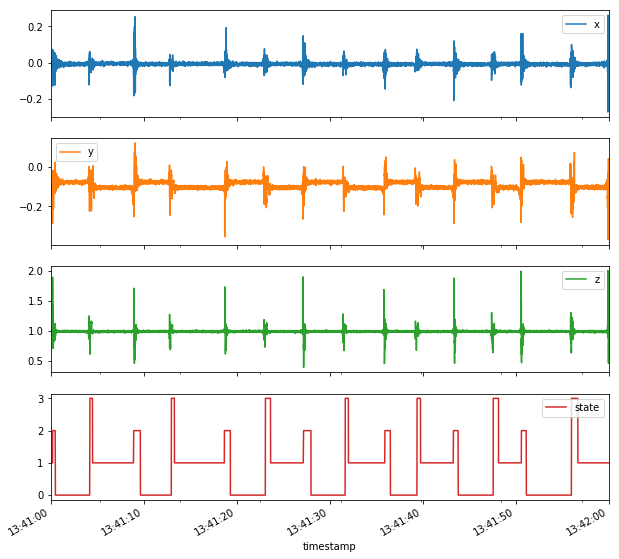

In [23]:
## Plot the x, y, z and state values for a single subject
## This visualistions not only show behaviourial patterns for different activities
## but also the frequenies of each activity

# ax = dfs200['sue'].plot(y=['x', 'y', 'z', 'state'], figsize=(10,10), subplots=True, layout=(2,2))
# dfs200['sue'].plot(x='timestamp', y='state', ax=ax, subplots=True)
start = pd.to_datetime('2019-03-27 13:41:00.00', format='%Y-%m-%d %H:%M:%S.%f', utc=True)
xlim = (start, start + pd.Timedelta('1 min'))

ax = dfs200['sue'].plot(x='timestamp', y=['x', 'y', 'z', 'state'], figsize=(10,10), xlim=xlim, subplots=True, layout=(4,1))

In [73]:
print(list(data200))

['dilhan', 'jacob', 'daniel', 'saeid', 'sue', 'bojan', 'lenin', 'laura']


[[212.005, 334.13, 299.625, 512.825, 76.955, 436.55, 254.89, 386.84], [192.95, 397.125, 352.01, 532.935, 128.325, 637.49, 263.33, 415.235], [80.89, 80.115, 57.935, 78.7, 11.005, 77.48, 40.795, 42.54], [71.04, 93.09, 74.735, 83.11, 8.79, 67.99, 39.68, 39.3]]
4


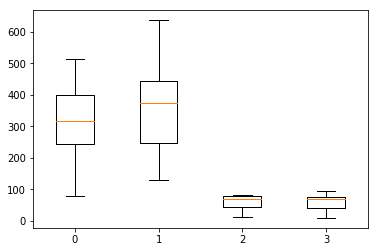

In [74]:
## Boxplot shows the total duration in seconds for each activity
## and their distribution across subjects.
## The duration per subject isn't shown since the goal isn't to discriminate subjects
## rather, it is to discriminate between activities

def group_by_activity(subjects, activities):
    grouped = [{a:[e['state'] for e in subjects[s] if e['state']==a] for a in activities} for s in subjects]
    return grouped

def plot_durations(grouped, activities):
    freq = 200
    durations = [[len(s[a])/freq for s in grouped] for a in activities]
    print(durations)
    print(len(durations))
    plt.boxplot(durations, labels=activities)
    plt.show()
    
activities = [i for i in range(0,4)]
grouped = group_by_activity(data200, activities)
plot_durations(grouped, activities)

Loaded 8 subjects
8
(45015, 5)
(45015, 5)
(45015, 5)
(45015, 5)
(45015, 5)
(45015, 5)
(45015, 5)
(45015, 5)


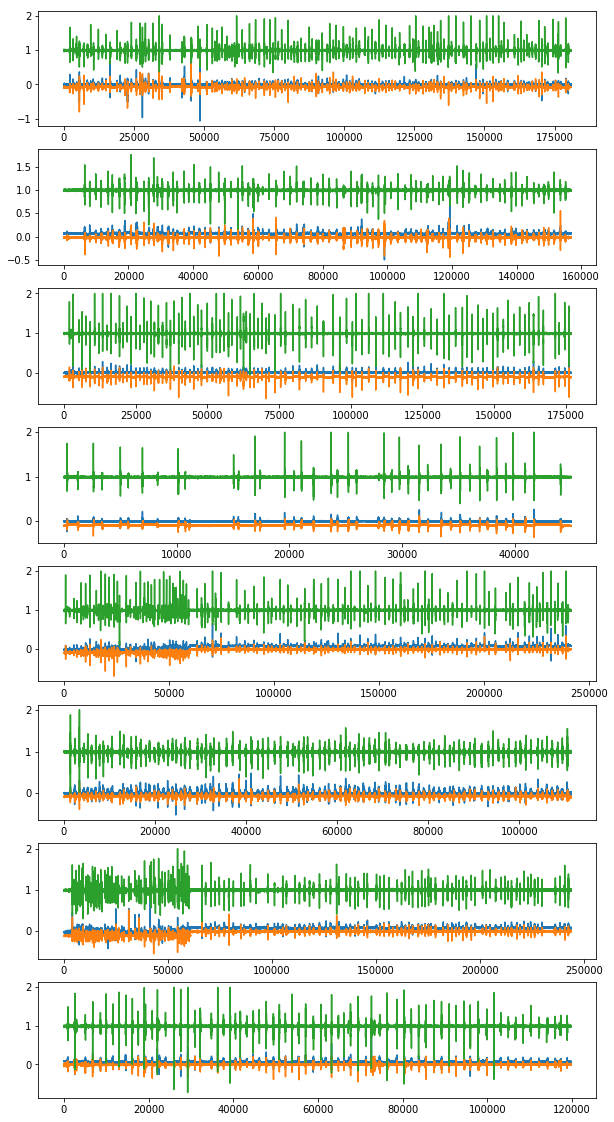

In [39]:
## Visualising trace data for each subject. We are interested in:
## 1) scale of traces and amplitudes per and across subjects (for normalising data)
## 2) patterns in the trace data across subjects (correlation between x, y and z)
## 3) a single transitional duration across subjects (for picking window size)

# def load_dataset(prefix=''):
#     subjects = list()
#     directory = prefix + 'HAR/'
#     for name in listdir(directory):
#         filename = directory + '/' + name
#         if not filename.endswith('.csv'):
#             continue
#         df = read_csv(filename, header=None)
#         # drop row number
#         values = df.values[:, 1:]
#         subjects.append(values)
#     return subjects

# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
    plt.figure(figsize=(10,20))
    # create a plot for each subject
    for i in range(len(subjects)):
        plt.subplot(len(subjects), 1, i+1)
        names = list(subjects)
        # plot each of x, y and z
        for j in ['x','y','z']:
            plt.plot(subjects[names[i]][j])
    plt.show()

print('Loaded %d subjects' % len(dfs200))
print(len(dfs200))
# plot trace data for each subject
plot_subjects(dfs200)

Loaded 8 subjects


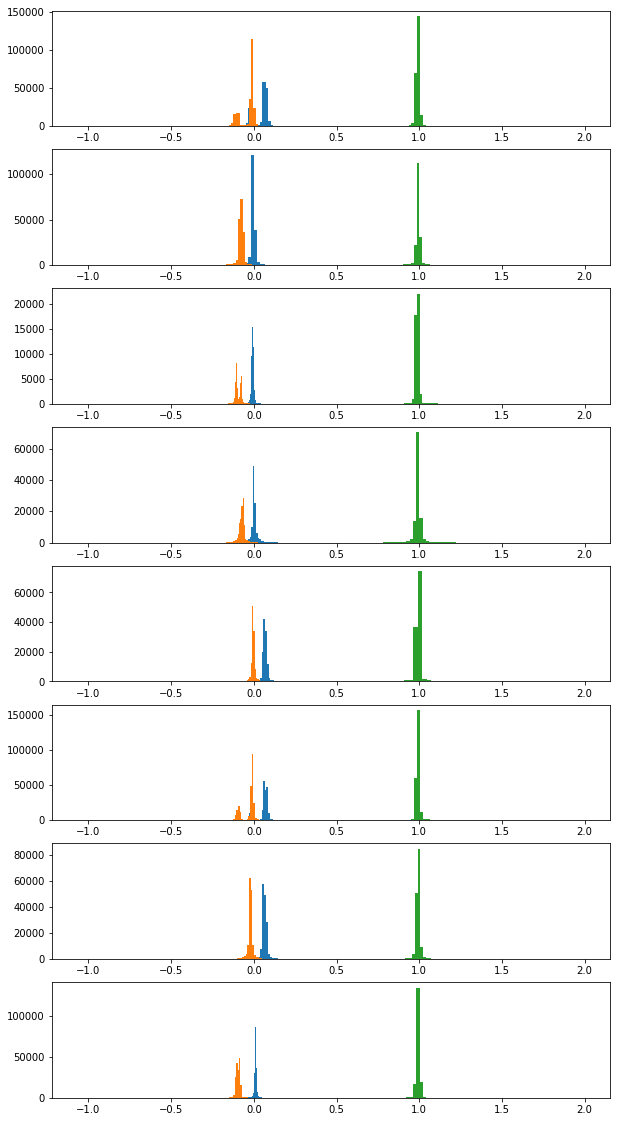

In [5]:
## Plotting the histograms of the traces per subject
## Helps with recognising their distributions and thus with outlier detection
## Shows the spread of the traces and will help with normalising the traces necessary for cross subject modeling
## This plot help to show both the relationship between the distributions within a subject and differences in the distributions between subjects
## Perhaps plot histograms per activity?

# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
    plt.figure(figsize=(10,20))
    names = list(subjects)
    # create a plot for each subject
    xaxis = None
    for i in range(len(subjects)):
        ax = plt.subplot(len(subjects), 1, i+1, sharex=xaxis)
        if i == 0:
            xaxis = ax
        # plot a histogram of x data
        for j in ['x','y','z']:
            plt.hist(subjects[names[i]][j], bins=100)
    plt.show()

print('Loaded %d subjects' % len(dfs200))
# plot trace data for each subject
plot_subjects(dfs200)